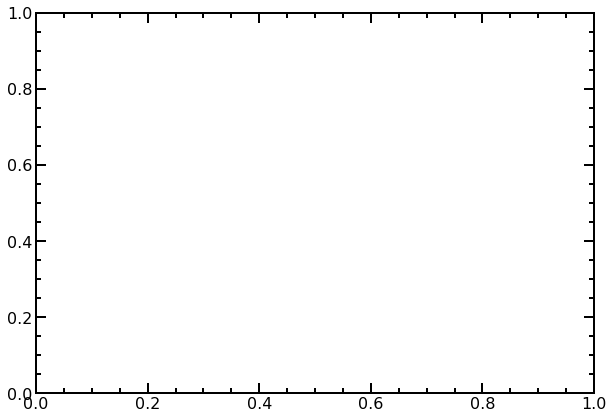

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from qutip import *
import sys
#here, configure the path to the directory for pre-defined functions.
sys.path.append('/Users/longnguyen/Documents/GitHub/Fluxonium_berkeley/')
import plotting_settings
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

Simulate the Hamiltonian
$$
H = 4E_C(n-n_g)^2 -E_J\cos(\varphi/2)
$$

In [22]:
#Solve in phase basis
Nphi = 601
Ej = 8
Ec = 0.1
ng = 0.5
phi = np.linspace(-np.pi,np.pi,2*Nphi+1)
phi_op = np.diag(phi)
cosphi2 = np.diag(np.cos(phi/2))
cosphi2_op = Qobj(cosphi2)
dphi = phi[-1]-phi[-2]
dphi_coeff = -1.0j/(2*dphi)
n_op = dphi_coeff*(np.diag(np.ones(2*Nphi), 1) - np.diag(np.ones(2*Nphi), -1))
# print (commutator(Qobj(phi_op), Qobj(n_op)))
def hamiltonian_phase(Ec, Ej, ng):
#     m = 4*Ec*(Qobj(n_op)-ng)**2 - Ej*Qobj(phi_op).cosm()
    m = 4*Ec*(Qobj(n_op)-ng)**2 - Ej*cosphi2_op
    return m
energies, wavefunction = hamiltonian_phase(Ec, Ej, ng).eigenstates()

(-1.0, 1.0)

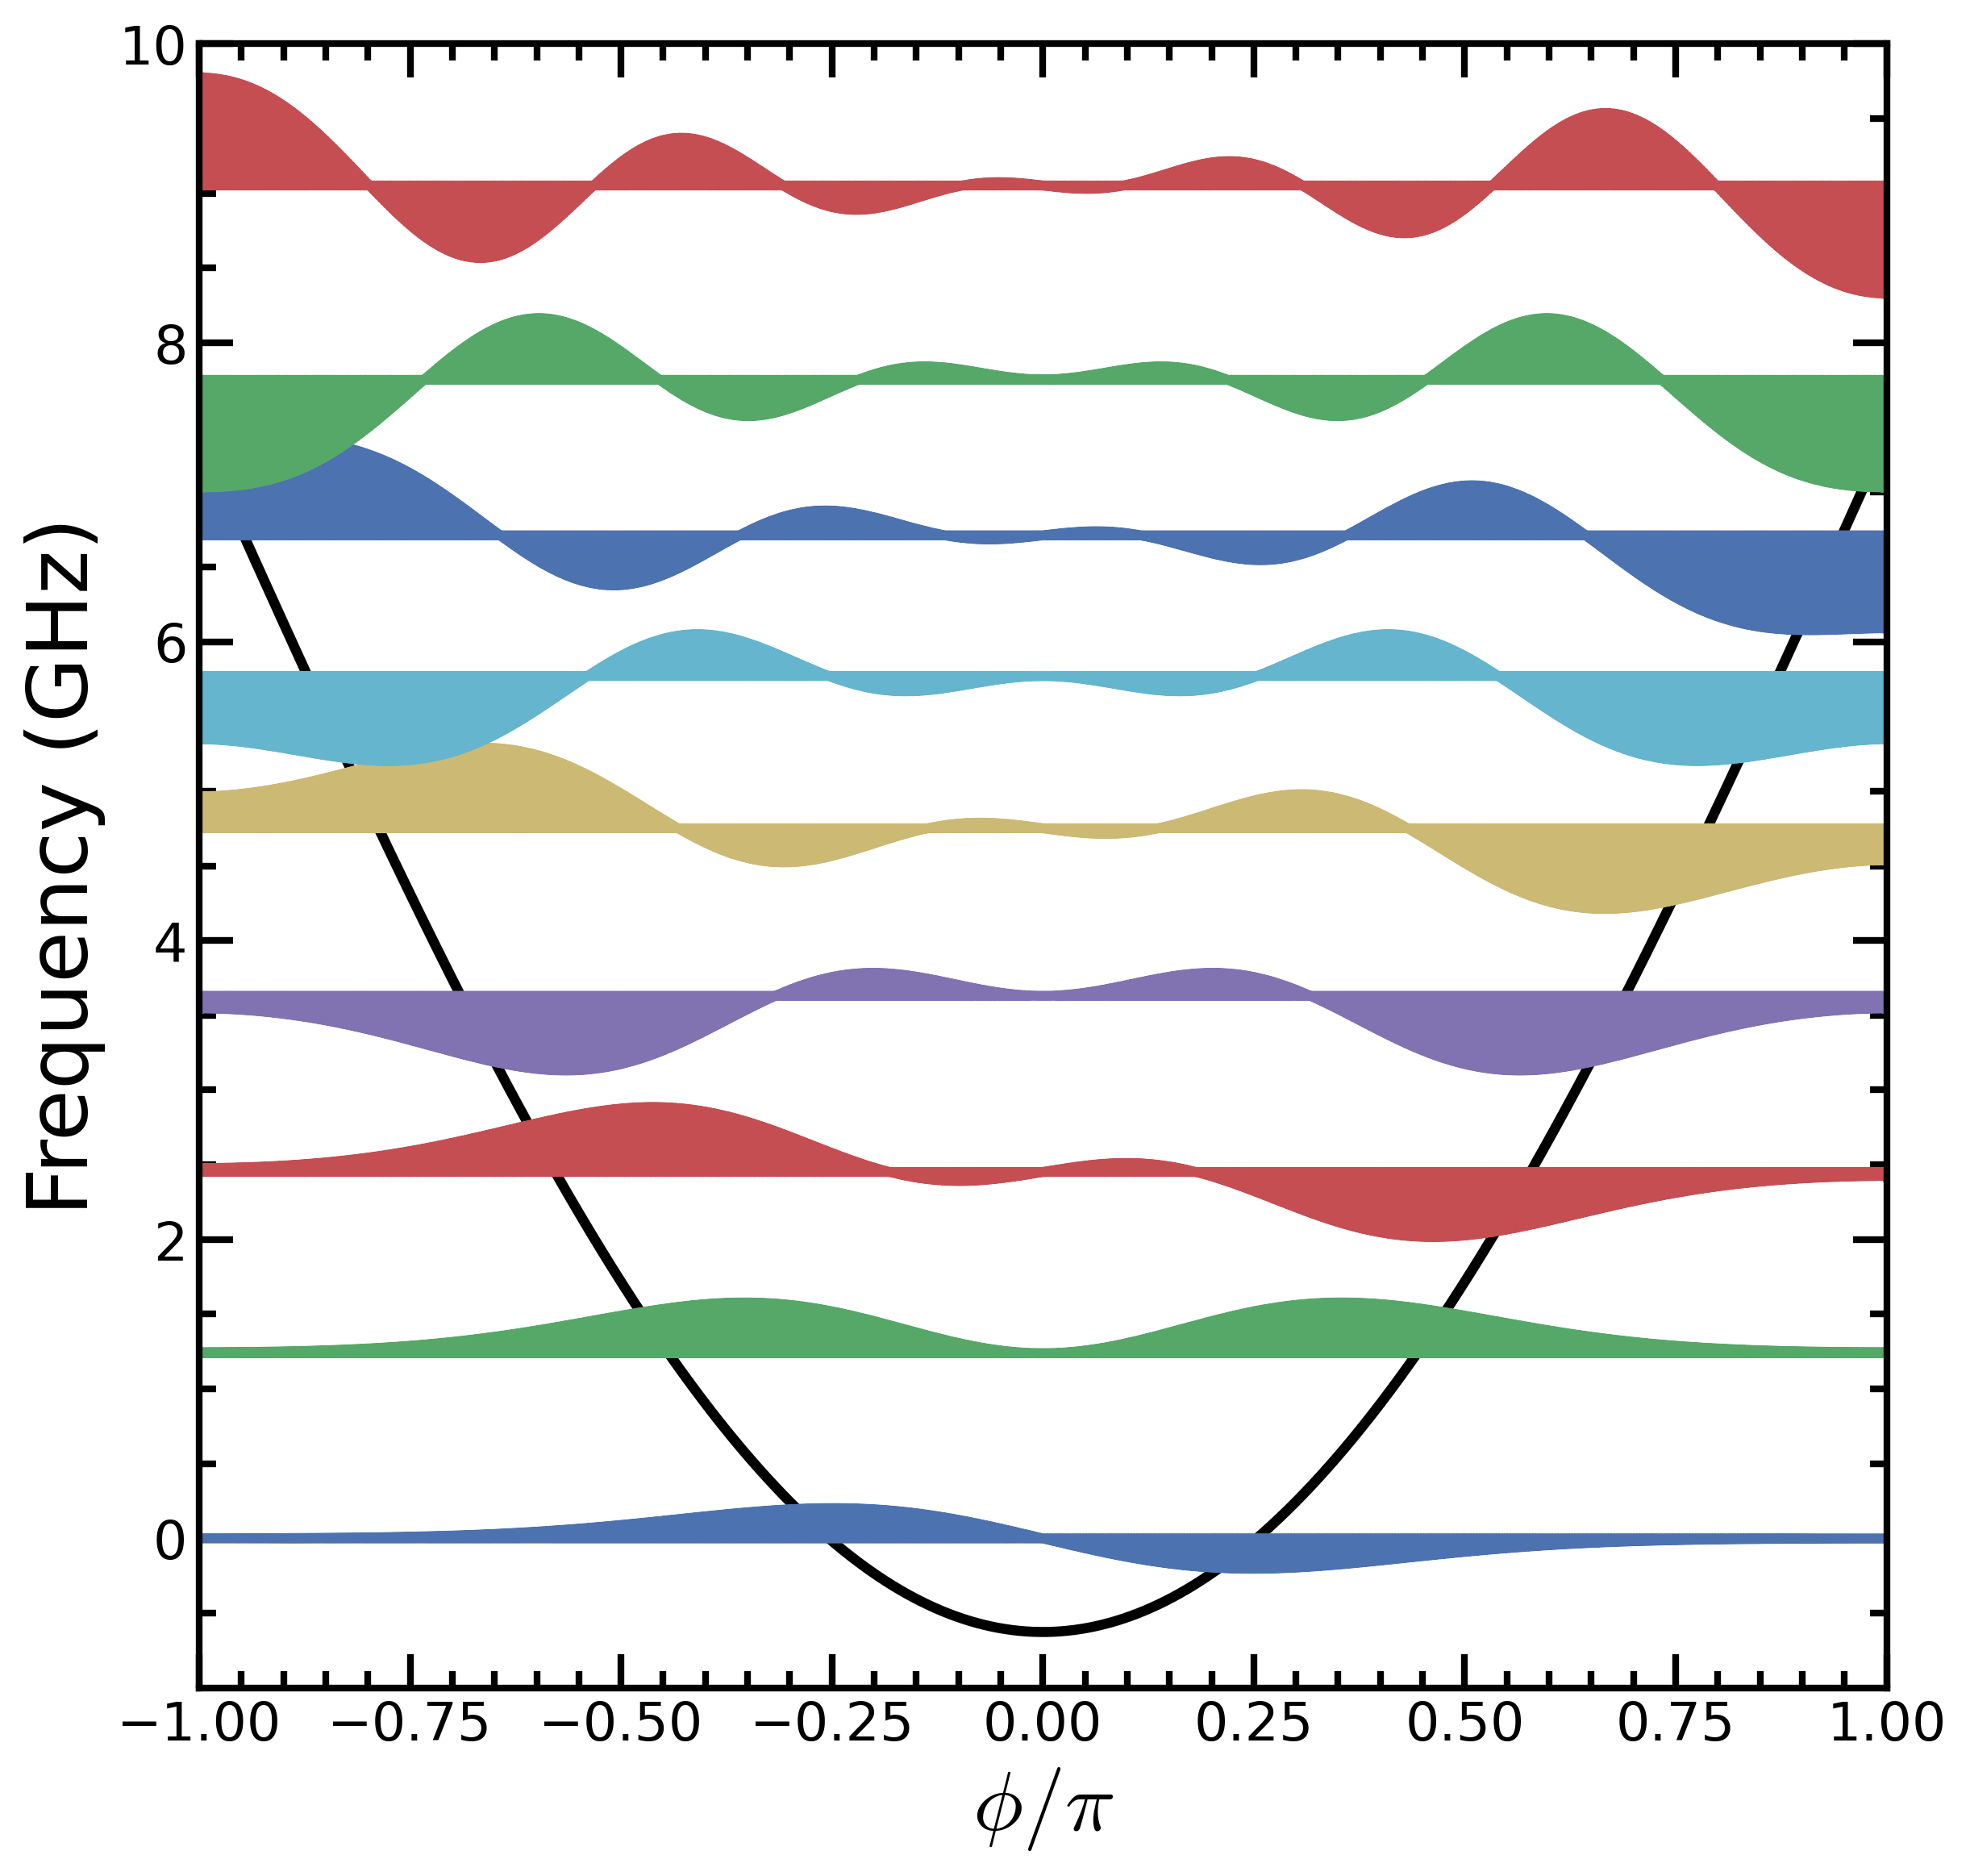

In [23]:
plt.figure(figsize =[9,9])
plt.plot(phi/np.pi, -Ej*np.cos(phi/2)-energies[0], color = 'k')
for state_to_plot in range(0,17,2):
    plt.plot(phi/np.pi, np.real(wavefunction[state_to_plot].full()[:,0])*10+energies[state_to_plot]-energies[0]) 
plt.ylim([-1,10])
plt.xlabel('$\phi / \pi$')
plt.ylabel('Frequency (GHz)')
plt.xlim([phi[0]/np.pi, phi[-1]/np.pi])

# Simulation of the $\cos(\varphi/2)$ element in qubit

Simulate the Hamiltonian
$$
H = 4E_C(n-n_g)^2 -E_J\cos(\varphi/2) + \frac{1}{2}E_L(\varphi-\varphi_\mathrm{ext})^2 
$$
compare it with Fluxonium

### Harmonic oscillator basis


In [144]:
#define the operators
def n_ho(N,E_C,E_L):
    a = destroy(N)
    return 1.0j*(0.125*E_L/E_C)**(0.25)*(a.dag()-a)/np.sqrt(2)

def phi_ho(N,E_C,E_L):
    a = destroy(N)
    return (8.0*E_C/E_L)**(0.25)*(a.dag()+a)/np.sqrt(2)

def hamiltonian_ho(N,E_J,E_C,E_L,phi_ext,ng):
    n = n_ho(N,E_C,E_L)
    phi = phi_ho(N,E_C,E_L)
    H = 4*E_C*(n-ng)**2 + 0.5*E_L*(phi-phi_ext)**2 - E_J*(phi/2).cosm()
    return H

In [164]:
N=30
E_J = 4
E_C = 2
E_L = 0.1
phi_ext = 0
ng = 0.0
level_num = 10
phi_ext_array = np.linspace(0,2,401)
ng_array = np.linspace(0,1,101)
energies = np.zeros((len(phi_ext_array), level_num))
for phi_idx, phi_ext in enumerate(phi_ext_array):  
    H = hamiltonian_ho(N,E_J,E_C,E_L,phi_ext*2*np.pi,ng)
    energies[phi_idx,:] = H.eigenenergies(eigvals=level_num)

Text(0, 0.5, 'Freq (GHz)')

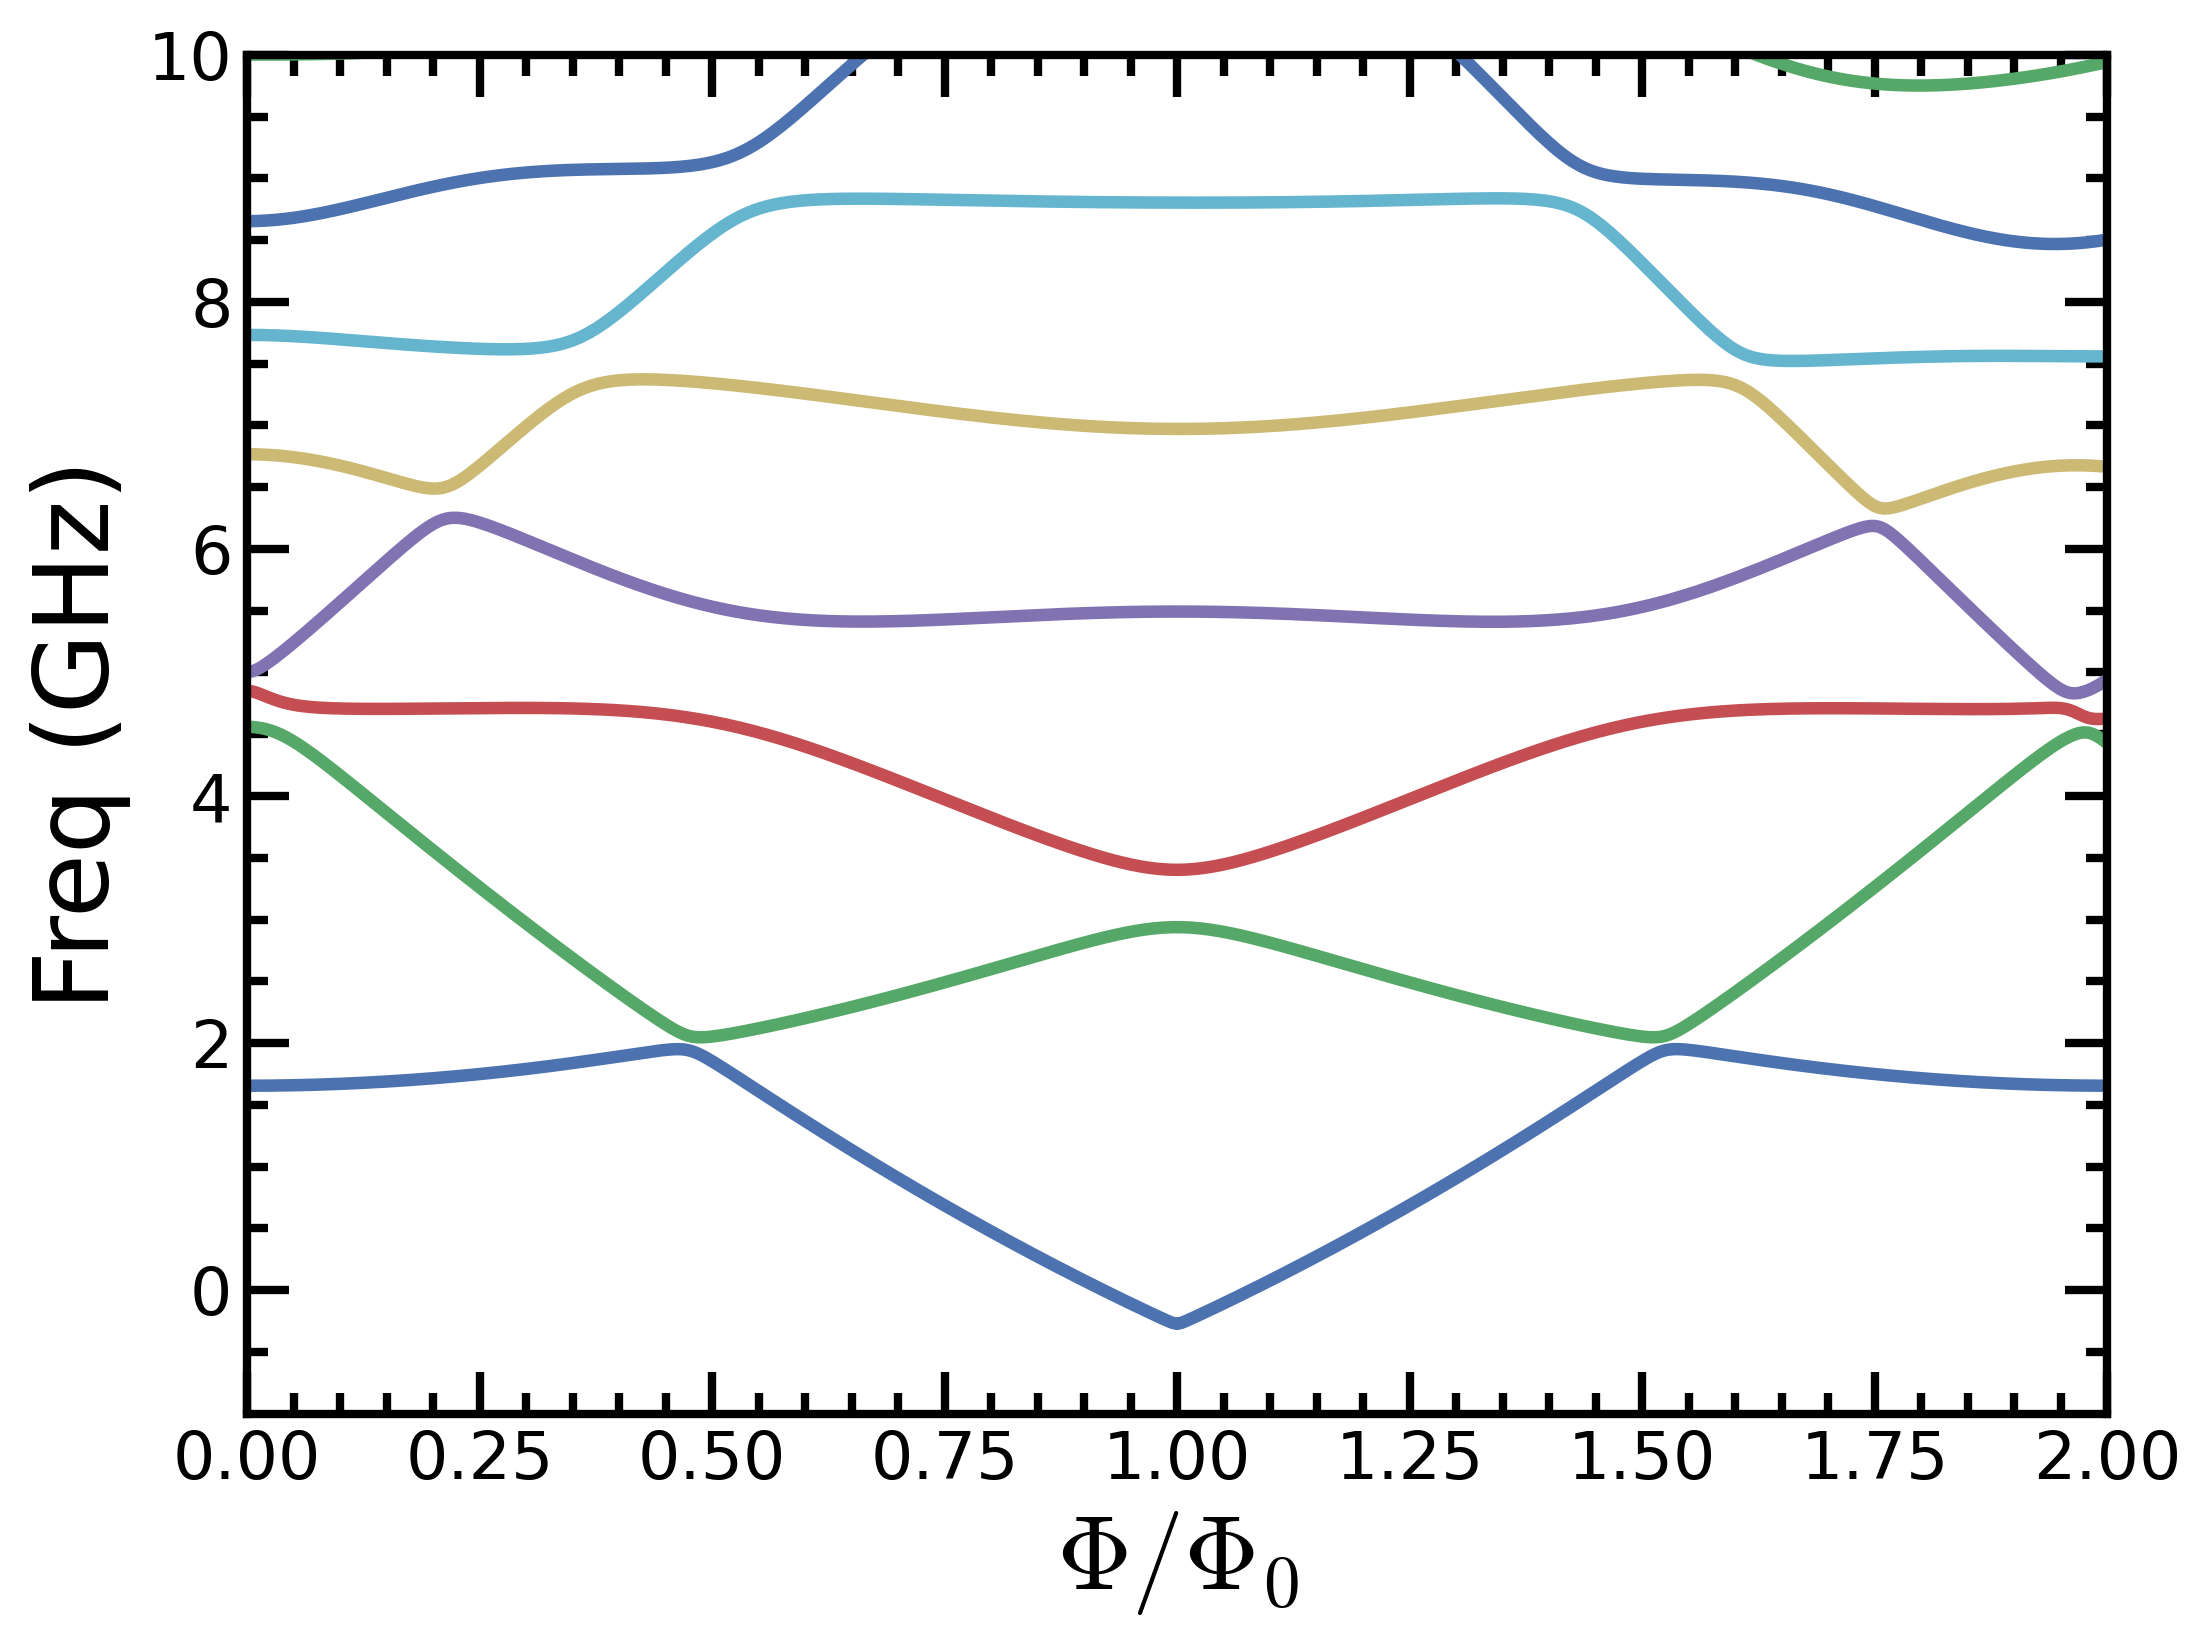

In [165]:
plt.figure(figsize=[8,6])
for idx in range(1,level_num):
    plt.plot(phi_ext_array, energies[:,idx])# - energies[:,0])
plt.xlim([phi_ext_array[0],phi_ext_array[-1]])
plt.ylim([-1,10])
plt.xlabel("$\Phi/\Phi_0$")
plt.ylabel("Freq (GHz)")

In [166]:
#matrix element
def charge_matrix_element(N,E_J,E_C,E_L,phi_ext,ng,iState,fState):
    n = n_ho(N,E_C,E_L)
    H = hamiltonian_ho(N,E_J,E_C,E_L,phi_ext,ng)
    _,eigenstates = H.eigenstates()
    return n.matrix_element(eigenstates[iState],eigenstates[fState])

def phase_matrix_element(N,E_J,E_C,E_L,phi_ext,ng,iState,fState):
    phi = phi_ho(N,E_C,E_L)
    H = hamiltonian_ho(N,E_J,E_C,E_L,phi_ext,ng)
    _,eigenstates = H.eigenstates()
    return phi.matrix_element(eigenstates[iState],eigenstates[fState])

In [167]:
charge_elements = np.zeros_like(energies)
phase_elements = np.zeros_like(energies)
for phi_idx, phi_ext in enumerate(phi_ext_array):  
    H = hamiltonian_ho(N,E_J,E_C,E_L,phi_ext*2*np.pi,ng)
    charge_elements[phi_idx,0] = abs(charge_matrix_element(N,E_J,E_C,E_L,phi_ext*2*np.pi,ng,0,1))
    charge_elements[phi_idx,1] = abs(charge_matrix_element(N,E_J,E_C,E_L,phi_ext*2*np.pi,ng,0,2))
    charge_elements[phi_idx,2] = abs(charge_matrix_element(N,E_J,E_C,E_L,phi_ext*2*np.pi,ng,1,2))
    charge_elements[phi_idx,3] = abs(charge_matrix_element(N,E_J,E_C,E_L,phi_ext*2*np.pi,ng,0,3))
    phase_elements[phi_idx,0] = abs(phase_matrix_element(N,E_J,E_C,E_L,phi_ext*2*np.pi,ng,0,1))
    phase_elements[phi_idx,1] = abs(phase_matrix_element(N,E_J,E_C,E_L,phi_ext*2*np.pi,ng,0,2))
    phase_elements[phi_idx,2] = abs(phase_matrix_element(N,E_J,E_C,E_L,phi_ext*2*np.pi,ng,1,2))
    phase_elements[phi_idx,3] = abs(phase_matrix_element(N,E_J,E_C,E_L,phi_ext*2*np.pi,ng,0,3))

(0.0, 2.0)

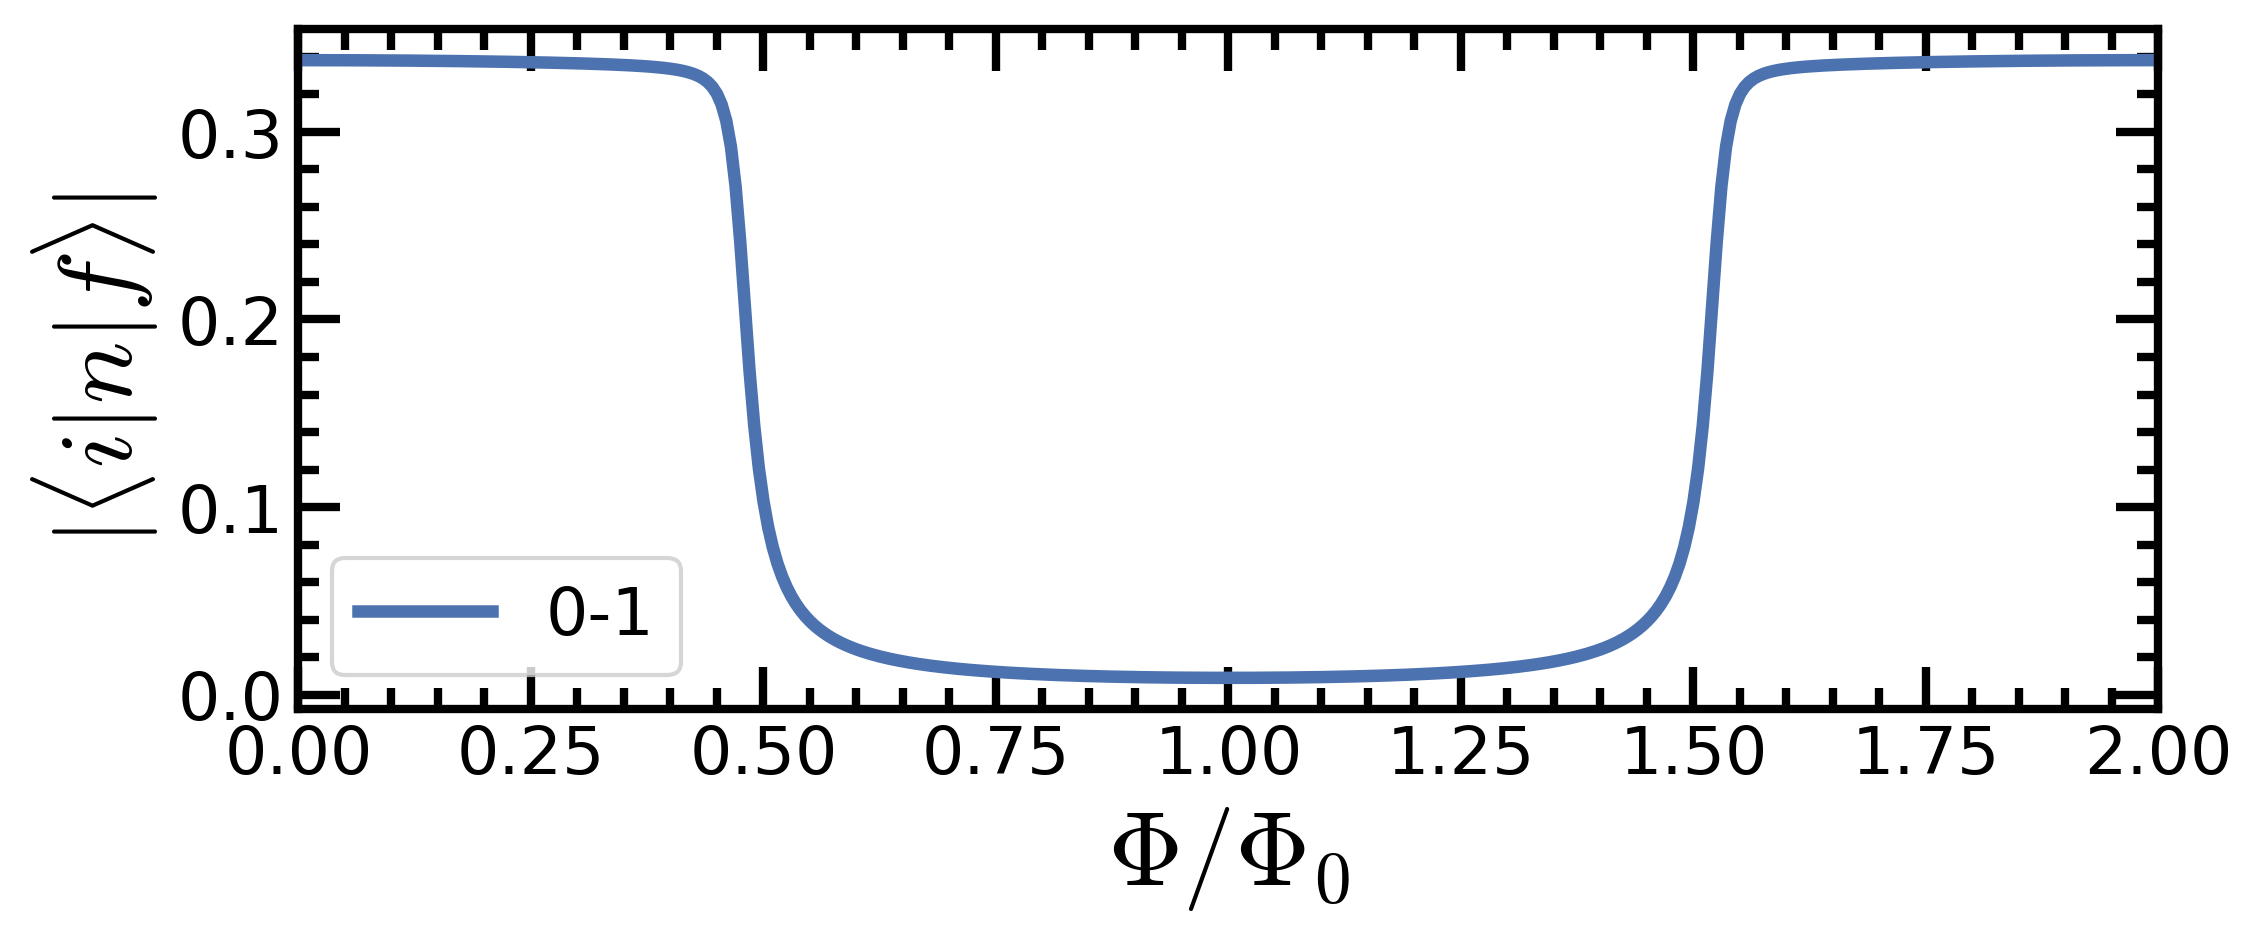

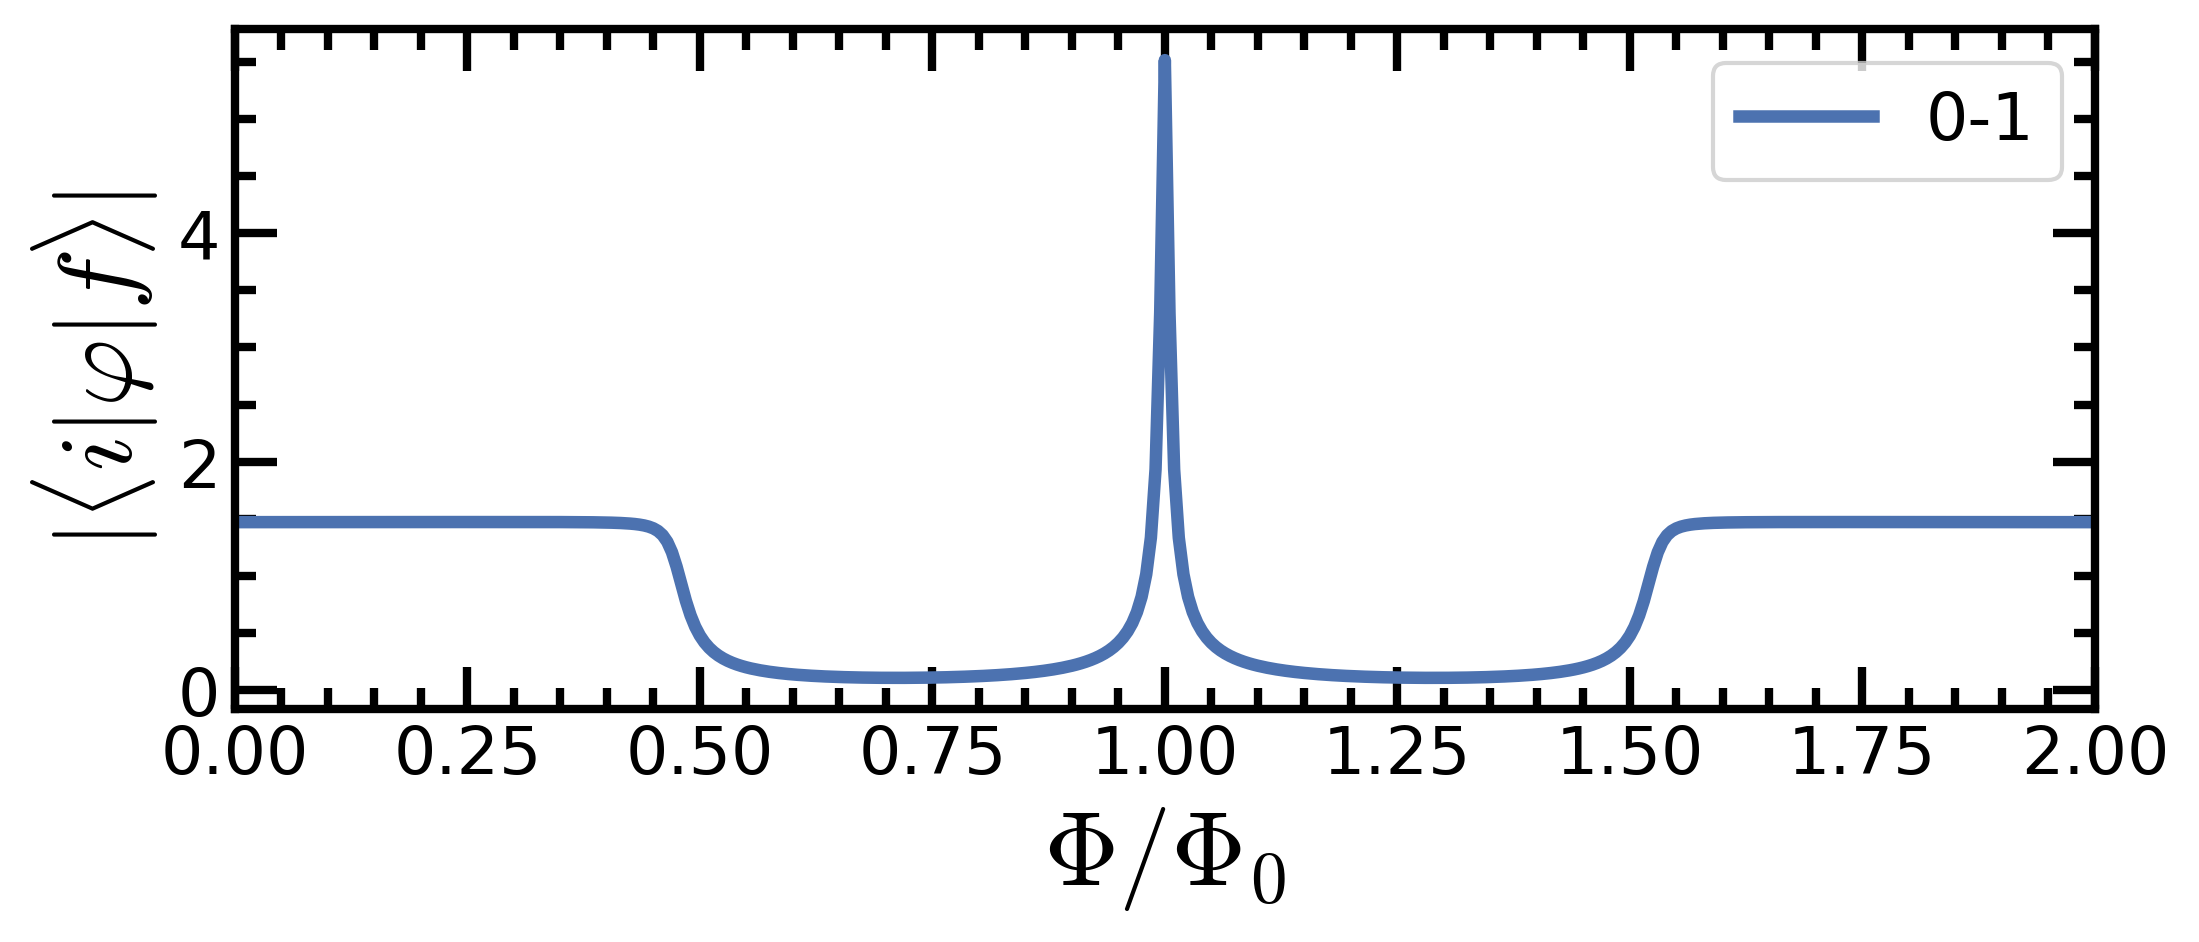

In [168]:
plt.figure(figsize = [8,3])
plt.plot(phi_ext_array, charge_elements[:,0], label = '0-1')
# plt.plot(phi_ext_array, charge_elements[:,1], label = '0-2')
# plt.plot(phi_ext_array, charge_elements[:,2], label = '1-2')
# plt.plot(phi_ext_array, charge_elements[:,3], label = '0-3')
plt.legend()
plt.xlabel(r"$\Phi/\Phi_0$")
plt.ylabel(r"$|\langle i|n|f \rangle|$")
plt.xlim([phi_ext_array[0],phi_ext_array[-1]])

plt.figure(figsize = [8,3])
plt.plot(phi_ext_array, phase_elements[:,0], label = '0-1')
# plt.plot(phi_ext_array, phase_elements[:,1], label = '0-2')
# plt.plot(phi_ext_array, phase_elements[:,2], label = '1-2')
# plt.plot(phi_ext_array, phase_elements[:,3], label = '0-3')
plt.legend()
plt.xlabel(r"$\Phi/\Phi_0$")
plt.ylabel(r"$|\langle i|\varphi |f \rangle|$")
plt.xlim([phi_ext_array[0],phi_ext_array[-1]])

## Bi-fluxon Hamiltonian
Explore 
$$
H_\varphi = 4E_{CL}n_\varphi^2 \mp E_J\cos\frac{\varphi}{2} + \frac{E_L}{2}(\varphi - \varphi_\mathrm{ext})^2
$$
and
$$
H_n = -4E_C(n_g-0.5)\sigma_Z
$$

### Phase component   
    

In [173]:
#Solve in phase basis
Nphi = 1000
Ej = 4
Ec = 1
El = 0.1
phi_pts = np.linspace(-8,8,Nphi+1)*np.pi
op_phi = Qobj(np.diag(phi_pts))
dphi = phi_pts[-1]-phi_pts[-2]
dphi_coeff = 1.0j/(2*dphi)
n = dphi_coeff*(np.diag(np.ones(Nphi), 1) - np.diag(np.ones(Nphi), -1))
op_n = Qobj(n)
def hamiltonian_phase(Ec, Ej, El, phi_ext):
    m = 4*Ec*(op_n)**2 +Ej*(op_phi/2).cosm() +0.5*El*(op_phi+phi_ext)**2
    return m

(-8.0, 8.0)

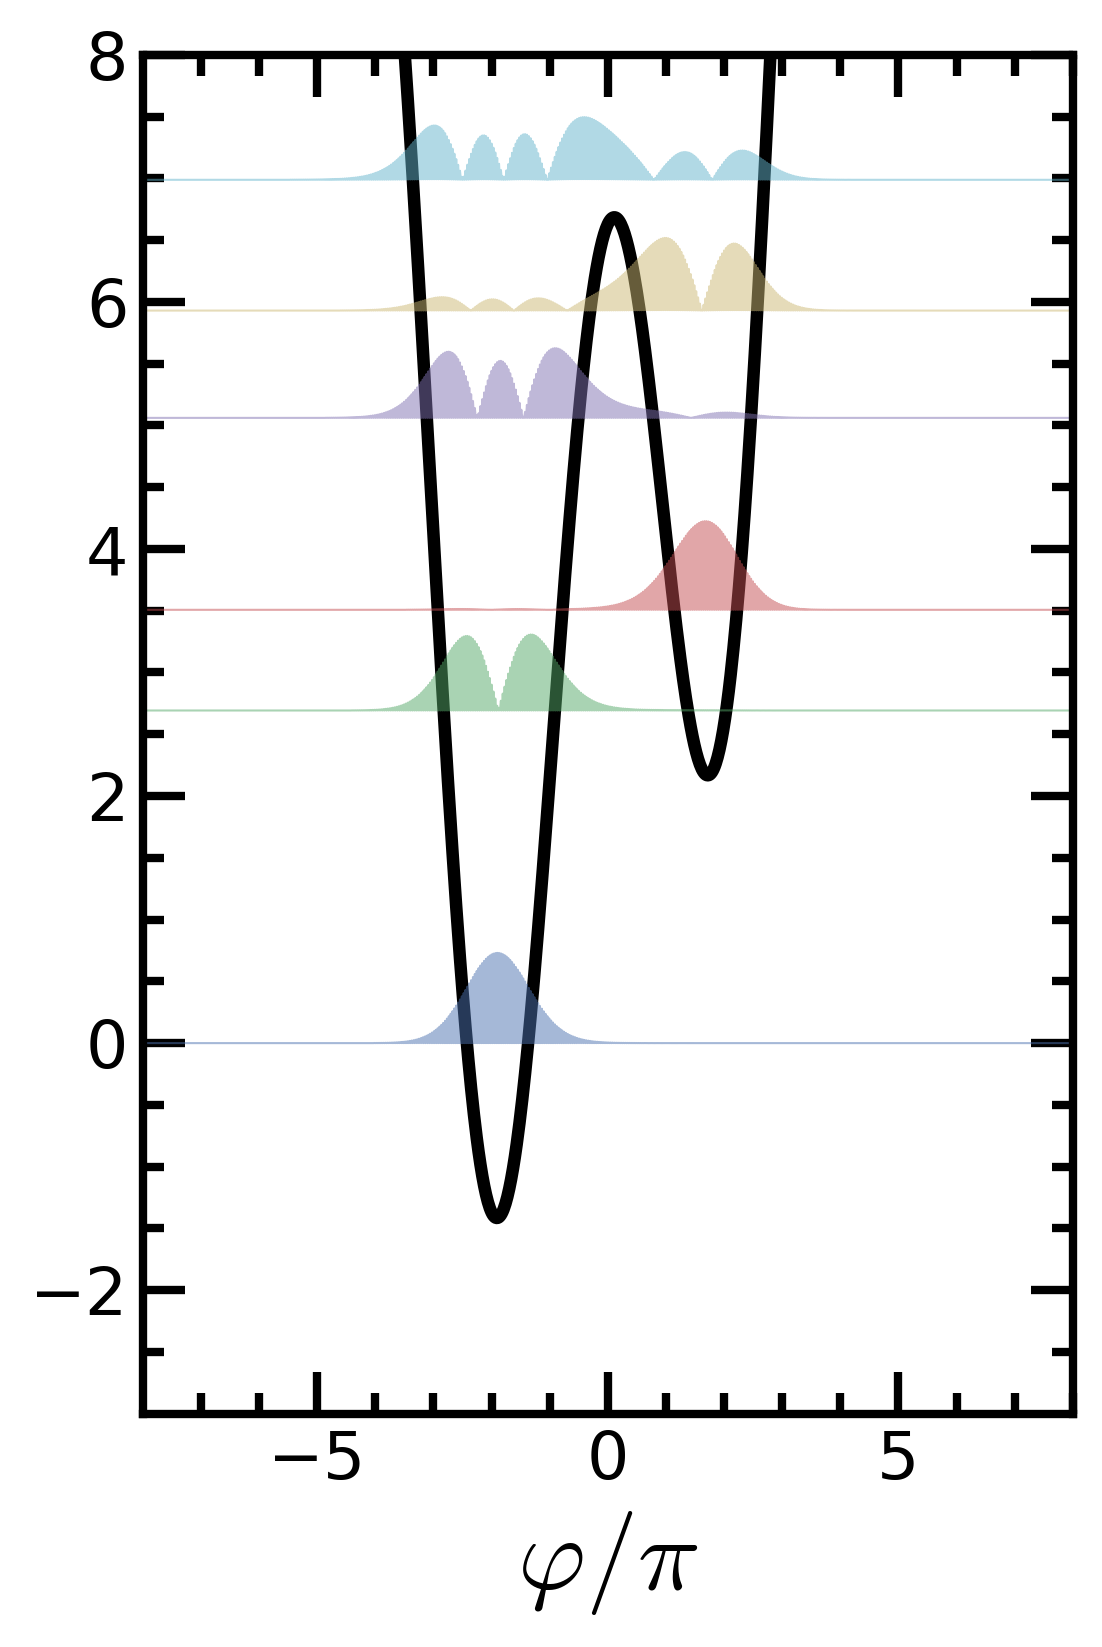

In [174]:
phi_ext = 0.5*2*np.pi
plt.figure(figsize =[4,6])
energies, wavefunction = hamiltonian_phase(Ec, Ej, El, phi_ext).eigenstates()
plt.plot(phi_pts/np.pi, +Ej*np.cos(phi_pts/2) + 0.5*El*(phi_pts+phi_ext)**2 - energies[0], color = 'k')
for state_to_plot in range(0,17,2):
    plt.plot(phi_pts/np.pi, abs(np.real(wavefunction[state_to_plot].full()[:,0])*4)+energies[state_to_plot]-energies[0], alpha = 0.5, linewidth = 0.5) 
plt.ylim([-3,8])
plt.xlabel(r'$\varphi / \pi$')
# plt.ylabel(r'$|\langle \varphi|\psi \rangle | $')
plt.xlim([phi_pts[0]/np.pi, phi_pts[-1]/np.pi])

### Charge component

In [197]:
#Consider the charge component
def hamiltonian_charge(E_C,ng):
    return -4*E_C*(ng-0.5)\sigma_Z

In [198]:
phi_ext = 0.5*2*np.pi
plt.figure(figsize =[4,6])
energies, wavefunction = hamiltonian_charge(Ec, Ej, El, phi_ext).eigenstates()
for state_to_plot in range(0,17,2):
    plt.bar(n_pts, abs(np.real(wavefunction[0].full()[:,0])), linewidth = 0.5) 
# plt.ylim([-3,8])
plt.xlabel(r'$n_\varphi$')
# plt.ylabel(r'$|\langle \varphi|\psi \rangle | $')
plt.xlim([n_pts[0], n_pts[-1]])

Exception: Raising a qobj to some power works only for operators and super-operators (square matrices).

<Figure size 1200x1800 with 0 Axes>